In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [3]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [4]:
x_train=train_datagen.flow_from_directory(r"C:\Users\DELL\Desktop\Veg-dataset\Veg-dataset\train_set",target_size = (128,128), batch_size = 32,class_mode = 'categorical')

Found 11386 images belonging to 9 classes.


In [5]:
x_test=test_datagen.flow_from_directory(r"C:\Users\DELL\Desktop\Veg-dataset\Veg-dataset\test_set",target_size = (128,128), batch_size = 32,class_mode = 'categorical')

Found 3416 images belonging to 9 classes.


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [7]:
model=Sequential()

In [8]:
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))

In [9]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [10]:
model.add(Flatten())

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

In [13]:
model.add(Dense(9,activation='softmax'))

In [14]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [15]:
len(x_train)

356

In [16]:
1238/24

51.583333333333336

In [17]:
model.fit(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)

Epoch 1/10
356/356 [==============================] - 265s 742ms/step - loss: 1.3768 - accuracy: 0.5933 - val_loss: 0.7192 - val_accuracy: 0.7427
Epoch 2/10
356/356 [==============================] - 140s 394ms/step - loss: 0.5650 - accuracy: 0.8034 - val_loss: 0.6066 - val_accuracy: 0.7892
Epoch 3/10
356/356 [==============================] - 140s 393ms/step - loss: 0.4425 - accuracy: 0.8498 - val_loss: 0.4196 - val_accuracy: 0.8592
Epoch 4/10
356/356 [==============================] - 224s 629ms/step - loss: 0.3639 - accuracy: 0.8734 - val_loss: 0.2786 - val_accuracy: 0.9005
Epoch 5/10
356/356 [==============================] - 271s 760ms/step - loss: 0.3104 - accuracy: 0.8899 - val_loss: 0.2864 - val_accuracy: 0.8914
Epoch 6/10
356/356 [==============================] - 271s 760ms/step - loss: 0.2766 - accuracy: 0.9026 - val_loss: 0.3328 - val_accuracy: 0.8809
Epoch 7/10
356/356 [==============================] - 273s 766ms/step - loss: 0.2531 - accuracy: 0.9087 - val_loss: 0.3688 -

In [18]:
model.save('Veg-dataset.h5')

In [19]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [20]:
model=load_model('Veg-dataset.h5')

In [21]:
img=image.load_img(r"C:\Users\DELL\Desktop\Veg-dataset\Veg-dataset\test_set\Pepper,_bell___Bacterial_spot\b6f44b41-cb67-47be-9cf5-958c517ff465___JR_B.Spot 9100.JPG")

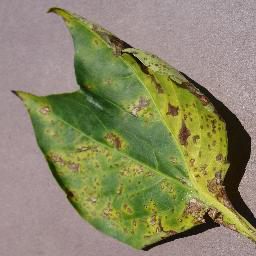

In [22]:
img

In [23]:
x=image.img_to_array(img)

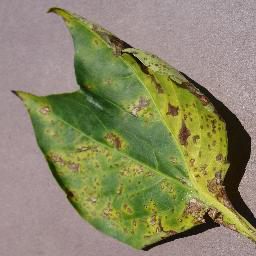

In [24]:
img=image.load_img(r"C:\Users\DELL\Desktop\Veg-dataset\Veg-dataset\test_set\Pepper,_bell___Bacterial_spot\b6f44b41-cb67-47be-9cf5-958c517ff465___JR_B.Spot 9100.JPG")
img

In [25]:
x=image.img_to_array(img)

In [26]:
x

array([[[152., 137., 142.],
        [152., 137., 142.],
        [153., 138., 143.],
        ...,
        [173., 161., 165.],
        [144., 132., 136.],
        [158., 146., 150.]],

       [[153., 138., 143.],
        [154., 139., 144.],
        [154., 139., 144.],
        ...,
        [177., 165., 169.],
        [162., 150., 154.],
        [170., 158., 162.]],

       [[155., 140., 145.],
        [155., 140., 145.],
        [156., 141., 146.],
        ...,
        [159., 147., 151.],
        [157., 145., 149.],
        [157., 145., 149.]],

       ...,

       [[158., 139., 141.],
        [157., 138., 140.],
        [157., 138., 140.],
        ...,
        [160., 142., 142.],
        [162., 144., 144.],
        [148., 130., 130.]],

       [[160., 141., 143.],
        [159., 140., 142.],
        [158., 139., 141.],
        ...,
        [136., 118., 116.],
        [170., 152., 150.],
        [163., 145., 143.]],

       [[165., 146., 148.],
        [163., 144., 146.],
        [161., 1

In [27]:
x=np.expand_dims(x,axis=0)

In [28]:
x

array([[[[152., 137., 142.],
         [152., 137., 142.],
         [153., 138., 143.],
         ...,
         [173., 161., 165.],
         [144., 132., 136.],
         [158., 146., 150.]],

        [[153., 138., 143.],
         [154., 139., 144.],
         [154., 139., 144.],
         ...,
         [177., 165., 169.],
         [162., 150., 154.],
         [170., 158., 162.]],

        [[155., 140., 145.],
         [155., 140., 145.],
         [156., 141., 146.],
         ...,
         [159., 147., 151.],
         [157., 145., 149.],
         [157., 145., 149.]],

        ...,

        [[158., 139., 141.],
         [157., 138., 140.],
         [157., 138., 140.],
         ...,
         [160., 142., 142.],
         [162., 144., 144.],
         [148., 130., 130.]],

        [[160., 141., 143.],
         [159., 140., 142.],
         [158., 139., 141.],
         ...,
         [136., 118., 116.],
         [170., 152., 150.],
         [163., 145., 143.]],

        [[165., 146., 148.],
       

In [31]:
x_train.class_indices

{'Pepper,_bell___Bacterial_spot': 0,
 'Pepper,_bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato___Bacterial_spot': 5,
 'Tomato___Late_blight': 6,
 'Tomato___Leaf_Mold': 7,
 'Tomato___Septoria_leaf_spot': 8}